# Section 1.2: Building Blocks - Qubits, Gates, and Operations

This notebook explores the fundamental building blocks of Cirq: qubits, gates, operations, and gate protocols. You'll learn how to construct and manipulate quantum circuits using Cirq's modular design.

## Learning Objectives

- Understand different qubit representations (LineQubit, GridQubit, NamedQubit)
- Distinguish between Gates and Operations
- Master gate protocols (unitary, inverse, decomposition)
- Work with common single and two-qubit gates
- Visualize gate matrices

In [1]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

## 1. Qubit Types

A qubit is an abstract identifier for a quantum two-level system. Cirq provides multiple qubit representations optimized for different hardware topologies.

In [2]:
# LineQubits: Arranged in a one-dimensional line
print("LineQubits - arranged in a line:")
line_qubits = cirq.LineQubit.range(3)
for q in line_qubits:
    print(f"  {q}")

LineQubits - arranged in a line:
  q(0)
  q(1)
  q(2)


In [3]:
# GridQubits: Arranged in a 2D grid (natural for Google's processors)
print("GridQubits - arranged in a 2D grid:")
grid_qubits = cirq.GridQubit.square(2)
for q in grid_qubits:
    print(f"  {q}")

GridQubits - arranged in a 2D grid:
  q(0, 0)
  q(0, 1)
  q(1, 0)
  q(1, 1)


In [4]:
# NamedQubits: Custom string identifiers
print("NamedQubits - custom identifiers:")
alice = cirq.NamedQubit("alice")
bob = cirq.NamedQubit("bob")
print(f"  {alice}")
print(f"  {bob}")

NamedQubits - custom identifiers:
  alice
  bob


## 2. Gates vs Operations

**Key Distinction:**
- A **Gate** is an immutable quantum transformation not tied to specific qubits (e.g., `cirq.H`, `cirq.X`)
- An **Operation** applies a Gate to specific qubits, representing a concrete quantum effect

Think of Gates as factories and Operations as their products.

In [5]:
q = cirq.LineQubit(0)

# Gate: abstract Hadamard gate
h_gate = cirq.H
print(f"Gate: {h_gate}")
print(f"Type: {type(h_gate)}")

# Operation: H gate applied to qubit 0
h_operation = cirq.H(q)
print(f"\nOperation: {h_operation}")
print(f"Type: {type(h_operation)}")
print(f"Targets: {h_operation.qubits}")
print(f"Gate: {h_operation.gate}")

Gate: H
Type: <class 'cirq.ops.common_gates.HPowGate'>

Operation: H(q(0))
Type: <class 'cirq.ops.gate_operation.GateOperation'>
Targets: (cirq.LineQubit(0),)
Gate: H


## 3. Common Quantum Gates

Cirq provides a comprehensive library of standard quantum gates.

In [6]:
q0, q1 = cirq.LineQubit.range(2)

print("Single-qubit gates:")
single_gates = [
    (cirq.H, "Hadamard - creates superposition"),
    (cirq.X, "Pauli-X - bit flip (NOT gate)"),
    (cirq.Y, "Pauli-Y - bit and phase flip"),
    (cirq.Z, "Pauli-Z - phase flip"),
    (cirq.S, "S gate - sqrt(Z)"),
    (cirq.T, "T gate - fourth root of Z"),
]

for gate, description in single_gates:
    print(f"  {str(gate(q0)).ljust(15)} - {description}")

Single-qubit gates:
  H(q(0))         - Hadamard - creates superposition
  X(q(0))         - Pauli-X - bit flip (NOT gate)
  Y(q(0))         - Pauli-Y - bit and phase flip
  Z(q(0))         - Pauli-Z - phase flip
  S(q(0))         - S gate - sqrt(Z)
  T(q(0))         - T gate - fourth root of Z


In [7]:
print("Parameterized rotation gates:")
angle = np.pi / 4
rotations = [
    (cirq.rx(angle), "Rotation about X-axis"),
    (cirq.ry(angle), "Rotation about Y-axis"),
    (cirq.rz(angle), "Rotation about Z-axis"),
]

for gate_op, description in rotations:
    print(f"  {str(gate_op(q0)).ljust(25)} - {description}")

Parameterized rotation gates:
  Rx(0.25π)(q(0))           - Rotation about X-axis
  Ry(0.25π)(q(0))           - Rotation about Y-axis
  Rz(0.25π)(q(0))           - Rotation about Z-axis


In [8]:
print("Two-qubit gates:")
two_qubit_gates = [
    (cirq.CNOT, "CNOT - controlled-NOT (entangling gate)"),
    (cirq.CZ, "CZ - controlled-Z (entangling gate)"),
    (cirq.SWAP, "SWAP - exchanges quantum states"),
]

for gate, description in two_qubit_gates:
    print(f"  {str(gate(q0, q1)).ljust(20)} - {description}")

Two-qubit gates:
  CNOT(q(0), q(1))     - CNOT - controlled-NOT (entangling gate)
  CZ(q(0), q(1))       - CZ - controlled-Z (entangling gate)
  SWAP(q(0), q(1))     - SWAP - exchanges quantum states


## 4. Gate Protocols

Cirq endows gates with capabilities through protocols. These enable programmatic inspection and manipulation of gates.

### 4.1 Unitary Protocol

Retrieve the matrix representation of any gate.

In [9]:
# Get matrix representation
h_matrix = cirq.unitary(cirq.H)
print("Hadamard matrix:")
print(h_matrix)

# Verify unitarity: U†U = I
identity = h_matrix.conj().T @ h_matrix
print(f"\nVerify H is unitary (H†H = I):")
print(identity)
print(f"Is identity? {np.allclose(identity, np.eye(2))}")

Hadamard matrix:
[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]

Verify H is unitary (H†H = I):
[[ 1.00000000e+00+0.j -3.32272752e-18+0.j]
 [-3.32272752e-18+0.j  1.00000000e+00+0.j]]
Is identity? True


### 4.2 Inverse Protocol

Gates raised to power -1 are invertible.

In [10]:
q = cirq.LineQubit(0)
s_op = cirq.S(q)
s_inv_op = cirq.inverse(s_op)

print(f"S gate: {s_op}")
print(f"S† gate: {s_inv_op}")

# Verify S * S† = I
s_matrix = cirq.unitary(cirq.S)
s_inv_matrix = cirq.unitary(cirq.S ** -1)
result = s_matrix @ s_inv_matrix
print(f"\nS * S† = I?")
print(result)
print(f"Verified: {np.allclose(result, np.eye(2))}")

S gate: S(q(0))
S† gate: S**-1(q(0))

S * S† = I?
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Verified: True


### 4.3 Power Protocol

Gate exponentiation creates gate families. For example, `X**0.5` is the square root of X.

In [11]:
print("X^(1/2) (sqrt-X):")
sqrt_x = cirq.X ** 0.5
print(cirq.unitary(sqrt_x))

print(f"\nX^2 should equal I:")
x_squared = cirq.X ** 2
print(cirq.unitary(x_squared))

X^(1/2) (sqrt-X):
[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]

X^2 should equal I:
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


### 4.4 Decomposition Protocol

Break complex gates into simpler operations.

In [12]:
q0, q1 = cirq.LineQubit.range(2)
swap_op = cirq.SWAP(q0, q1)

print(f"Original operation: {swap_op}")
print(f"\nDecomposed into:")
for op in cirq.decompose(swap_op):
    print(f"  {op}")

Original operation: SWAP(q(0), q(1))

Decomposed into:
  Y**-0.5(q(1))
  CZ(q(0), q(1))
  Y**0.5(q(1))
  Y**-0.5(q(0))
  CZ(q(1), q(0))
  Y**0.5(q(0))
  Y**-0.5(q(1))
  CZ(q(0), q(1))
  Y**0.5(q(1))


## 5. Measurement Operations

Measurements extract classical information from quantum states.

In [13]:
q0 = cirq.LineQubit(0)
measurement_single = cirq.measure(q0, key='result')
print(f"Single qubit measurement: {measurement_single}")

qubits = cirq.LineQubit.range(3)
measurement_multi = cirq.measure(*qubits, key='results')
print(f"Multi-qubit measurement: {measurement_multi}")
print(f"  Measures {len(measurement_multi.qubits)} qubits jointly")

Single qubit measurement: cirq.MeasurementGate(1, cirq.MeasurementKey(name='result'), ())(q(0))
Multi-qubit measurement: cirq.MeasurementGate(3, cirq.MeasurementKey(name='results'), ())(q(0), q(1), q(2))
  Measures 3 qubits jointly


## 6. Visualize Gate Matrices

Let's visualize the matrix representations of common gates.

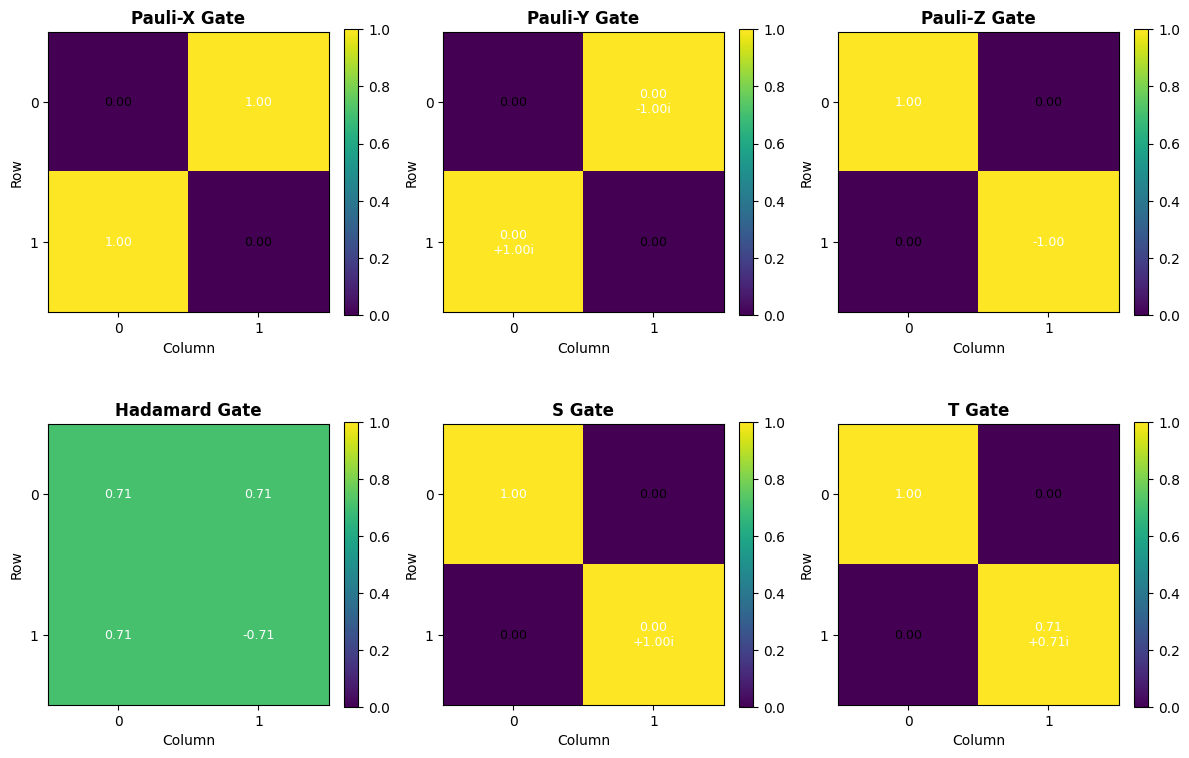

In [14]:
gates = [
    ("Pauli-X", cirq.X),
    ("Pauli-Y", cirq.Y),
    ("Pauli-Z", cirq.Z),
    ("Hadamard", cirq.H),
    ("S", cirq.S),
    ("T", cirq.T),
]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for idx, (name, gate) in enumerate(gates):
    matrix = cirq.unitary(gate)
    
    # Plot magnitude
    im = axes[idx].imshow(np.abs(matrix), cmap='viridis', vmin=0, vmax=1)
    axes[idx].set_title(f"{name} Gate", fontsize=12, fontweight='bold')
    axes[idx].set_xticks([0, 1])
    axes[idx].set_yticks([0, 1])
    axes[idx].set_xlabel('Column')
    axes[idx].set_ylabel('Row')
    
    # Add colorbar
    plt.colorbar(im, ax=axes[idx], fraction=0.046)
    
    # Add matrix values as text
    for i in range(2):
        for j in range(2):
            val = matrix[i, j]
            text_str = f"{val.real:.2f}"
            if abs(val.imag) > 1e-10:
                text_str += f"\n{val.imag:+.2f}i"
            axes[idx].text(j, i, text_str, ha="center", va="center",
                         color="white" if np.abs(matrix[i, j]) > 0.5 else "black",
                         fontsize=9)

plt.tight_layout()
plt.show()

## Exercises

Try modifying the code above to:

1. **Create a custom gate sequence**: Apply multiple gates to the same qubit and verify the combined matrix equals the product of individual matrices.

2. **Explore rotation gates**: Vary the angle parameter in `rx`, `ry`, `rz` and observe how the matrix changes.

3. **Decompose complex gates**: Try decomposing other two-qubit gates like CZ, and verify the decomposition is equivalent.

4. **Create your own gate**: Use `cirq.MatrixGate` to define a custom unitary and apply it to qubits.

## Key Takeaways

- **Qubits** are abstract identifiers; different types suit different hardware topologies
- **Gates** are abstract transformations; **Operations** apply gates to specific qubits
- **Gate protocols** enable programmatic inspection (unitary, inverse, decomposition)
- Cirq provides a comprehensive library of standard gates for circuit construction
- Matrix representations reveal the mathematical structure of quantum gates

Next: [Section 1.3 - Circuits](part1_section_1_3_circuits.ipynb)